In [315]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report

np.seterr(over='ignore')

{'divide': 'warn', 'over': 'ignore', 'under': 'ignore', 'invalid': 'warn'}

In [187]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

What is an optimization problem? 

- We aim to find the best state, according to some objective function. 
- An example of a state is the weights used in a machine learning model, such as a neural network
- State is represented by a one-dimensional vector 
- "Best" state is defined using the Cost Function/Fitness Function/Objective Function 
- Function takes in a State Array as Input and returns a Fitness Value as Output


We will make 3 steps to solve an optimization problem with mlrose:
 - 1) Define fitness function object
 - 2) Define an optimization problem object
 - 3) Select and run a randomized optimization algorithm

Variables to Modify: 

All of them: 
   - max_iters
   - max_attempts 
    
RHC: 
   - init_state: discrete 
   - restarts: default 0, range variable  
    
SA: 
   - init_state: discrete
   - schedule: Exponential, Geometric, Arithmetic
    
GA: 
   - pop_size: default 200, range variable  
   - mutation_prob: default 0.1, range (0,1)
    
Mimic: 
   - pop_size: default: 200, range variable 
   - keep_pct: default 0.2, range (0,1)

#### Tutorial - Machine Learning Weight Optimization Problems 

 Steps to Neural Network  Weight Optimization Problem 
 
 - 1) Initialize a ML weight optimization problem object
 - 2) Find optimal weights for a given training dataset by calling the fit method of object init in step 1 
 - 3) Predict labels for test dataset calling the predict method of obj from step 1

In [188]:
from sklearn.datasets import load_iris

In [189]:
# data is a dictionary
data = load_iris()

In [190]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [191]:
print(data.data[0])

[5.1 3.5 1.4 0.2]


In [192]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [193]:
print(data.target[0])

0


In [194]:
print(data.target_names[data.target[0]])

setosa


In [195]:
print(np.unique(data.target))

[0 1 2]


In [196]:
print(data.target_names[0])
print(data.target_names[1])
print(data.target_names[2])

setosa
versicolor
virginica


In [197]:
## Prep Data 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(data.data, data.target, 
                                                   test_size = 0.2, random_state = 3)

# Normalize Feature Data 
scaler = MinMaxScaler()

X_Train_Scaled = scaler.fit_transform(X_Train)
X_Test_Scaled = scaler.fit_transform(X_Test)

# One Hot Encode Target Values 
one_hot = OneHotEncoder()

Y_Train_Hot = one_hot.fit_transform(Y_Train.reshape(-1,1)).todense()
Y_Test_Hot = one_hot.fit_transform(Y_Test.reshape(-1,1)).todense()


Make Neural Network

##### Random Hill Climb

In [198]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu',
                                algorithm = 'random_hill_climb', max_iters=1000,
                                bias = True, is_classifier = True, learning_rate = 0.0001,
                                early_stopping = True, clip_max = 5, max_attempts = 100, 
                                random_state = 3)

nn_model1.fit(X_Train_Scaled, Y_Train_Hot)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[2],
              learning_rate=0.0001, max_iters=1000)

Use Neural Network to Predict on Test and Train data

In [199]:
# predict labels for Training Set 
Y_Train_Pred = nn_model1.predict(X_Train_Scaled)

Y_Train_Accuracy = accuracy_score(Y_Train_Hot, Y_Train_Pred)

print(Y_Train_Accuracy)

#predict labels for Testing Set 
Y_Test_Pred = nn_model1.predict(X_Test_Scaled)

Y_Test_Accuracy = accuracy_score(Y_Test_Hot, Y_Test_Pred)

print(Y_Test_Accuracy)

0.45
0.5666666666666667


##### Gradient Descent - same as BackPropogation, similar to Sklearn

In [200]:
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu',
                                algorithm = 'gradient_descent', max_iters=1000,
                                bias = True, is_classifier = True, learning_rate = 0.0001,
                                early_stopping = True, clip_max = 5, max_attempts = 100, 
                                random_state = 3)

nn_model2.fit(X_Train_Scaled, Y_Train_Hot)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[2],
              learning_rate=0.0001, max_iters=1000)

In [201]:
# predict labels for Training Set 
Y_Train_Pred = nn_model2.predict(X_Train_Scaled)

Y_Train_Accuracy = accuracy_score(Y_Train_Hot, Y_Train_Pred)

print(Y_Train_Accuracy)

#predict labels for Testing Set 
Y_Test_Pred = nn_model2.predict(X_Test_Scaled)

Y_Test_Accuracy = accuracy_score(Y_Test_Hot, Y_Test_Pred)

print(Y_Test_Accuracy)

0.625
0.6333333333333333


##### Simulated Annealing

In [202]:
schedule = mlrose.GeomDecay()
nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu',
                                algorithm = 'simulated_annealing', max_iters=1000,
                                bias = True, is_classifier = True, learning_rate = 0.0001,
                                early_stopping = True, clip_max = 5, max_attempts = 100, 
                                random_state = 3,
                                schedule = schedule)

nn_model3.fit(X_Train_Scaled, Y_Train_Hot)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[2],
              learning_rate=0.0001, max_iters=1000,
              schedule=<mlrose.decay.GeomDecay object at 0x7f87f3520610>)

In [203]:
# predict labels for Training Set 
Y_Train_Pred = nn_model3.predict(X_Train_Scaled)

Y_Train_Accuracy = accuracy_score(Y_Train_Hot, Y_Train_Pred)

print(Y_Train_Accuracy)

#predict labels for Testing Set 
Y_Test_Pred = nn_model3.predict(X_Test_Scaled)

Y_Test_Accuracy = accuracy_score(Y_Test_Hot, Y_Test_Pred)

print(Y_Test_Accuracy)

0.4583333333333333
0.5666666666666667


##### Genetic Algorithm

In [204]:
nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu',
                                algorithm = 'genetic_alg', max_iters=1000,
                                bias = True, is_classifier = True, learning_rate = 0.0001,
                                early_stopping = True, clip_max = 5, max_attempts = 100, 
                                random_state = 3,
                                pop_size=200)

nn_model4.fit(X_Train_Scaled, Y_Train_Hot)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[2],
              learning_rate=0.0001, max_iters=1000)

In [205]:
# predict labels for Training Set 
Y_Train_Pred = nn_model4.predict(X_Train_Scaled)

Y_Train_Accuracy = accuracy_score(Y_Train_Hot, Y_Train_Pred)

print(Y_Train_Accuracy)

#predict labels for Testing Set 
Y_Test_Pred = nn_model4.predict(X_Test_Scaled)

Y_Test_Accuracy = accuracy_score(Y_Test_Hot, Y_Test_Pred)

print(Y_Test_Accuracy)

0.9083333333333333
0.8666666666666667


TODO: read this documentation, try each algo: https://mlrose.readthedocs.io/en/stable/source/neural.html

In [206]:
nn_model4.fitted_weights

array([ 1.67729476,  0.85173743, -0.86436999, -3.04406682,  1.57281632,
        1.20068369,  3.41331195, -0.42434971, -1.93211357,  2.93124779,
       -4.73201025,  0.43811079,  4.92900583,  1.47776978,  0.78182121,
       -2.37719733])

In [207]:
nn_model4.loss

0.35066250312650965

In [208]:
print(nn_model1.loss)
print(nn_model2.loss)
print(nn_model3.loss)
print(nn_model4.loss)

1.064378274038072
0.8551592021027957
1.0653752190634014
0.35066250312650965


### Data Import

In [209]:
data_polling = pd.read_stata("Data/cumulative_2006_2018.dta")

In [210]:
inputs = ['year','st','gender', 'age', 'race', 'hispanic', 'educ', 'faminc', 'marstat', 'economy_retro', 'newsint','approval_pres']
targets = ['pid3']

keep = inputs + targets

data_polling = data_polling[(data_polling.year == 2018) & (data_polling.pid3.isin(['Democrat','Republican']) )]

polling = data_polling[keep]


In [211]:
polling.dropna(axis=0, how='any',inplace=True)

In [212]:
pd.options.mode.chained_assignment = None  # default='warn'

polling['age_band'] = np.NaN
polling.loc[ (polling['age'] >= 18) & (polling['age'] <= 29), 'age_band'] = 'Young'
polling.loc[ (polling['age'] >= 30) & (polling['age'] <= 49), 'age_band'] = 'Lower-Middle'
polling.loc[ (polling['age'] >= 50) & (polling['age'] <= 69), 'age_band'] = 'Upper-Middle'
polling.loc[ (polling['age'] >= 70) , 'age_band'] = 'Old'

In [213]:
polling.loc[ polling['pid3'] == "Democrat", "Dem_Ind"] = 1
polling.loc[ polling['pid3'] == 'Republican', "Dem_Ind"] = 0
polling['Dem_Ind'] = polling['Dem_Ind'].astype(int)

In [214]:
categorical_polling = ['st','gender', 'age_band', 'race', 'hispanic', 'educ', 'faminc', 'marstat', 'economy_retro', 'newsint','approval_pres']


In [215]:
polling.head()

,year,st,gender,age,race,hispanic,educ,faminc,marstat,economy_retro,newsint,approval_pres,pid3,age_band,Dem_Ind
392756,2018,OH,Female,58,White,No,Post-Grad,150k+,Married,Stayed About The Same,Only Now And Then,Approve / Somewhat Approve,Republican,Upper-Middle,0
392757,2018,KY,Female,66,White,No,Post-Grad,10k - 20k,Divorced,Stayed About The Same,Most Of The Time,Strongly Disapprove,Democrat,Upper-Middle,1
392758,2018,AZ,Female,88,White,No,High School Graduate,20k - 30k,Widowed,Gotten Much Better,Some Of The Time,Approve / Somewhat Approve,Republican,Old,0
392760,2018,NC,Male,71,White,No,High School Graduate,50k - 60k,Married,Gotten Much Better,Some Of The Time,Strongly Approve,Republican,Old,0
392761,2018,PA,Male,86,White,No,4-Year,60k - 70k,Widowed,Gotten Better / Somewhat Better,Most Of The Time,Strongly Approve,Republican,Old,0


In [216]:
small_polling = polling.sample(n=10000, random_state = 42)

In [269]:
small_polling['Dem_Ind'].value_counts()

1    5678
0    4322
Name: Dem_Ind, dtype: int64

In [217]:
X_polling = small_polling[categorical_polling]

y_polling = small_polling.loc[:,'Dem_Ind']


#### Dataset #2

In [218]:
# Originall Retrieved From: http://archive.ics.uci.edu/ml/datasets/Adult
# CSV Retrieved From: https://www.kaggle.com/uciml/adult-census-income
# URL: https://drive.google.com/file/d/1wuWJPeacMhHQSXdITZx1_pktoU-ZRb8n/view?usp=sharing
data_income = pd.read_csv("Data/adult.csv")

print(data_income.shape)

data_income.head()

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [219]:
# Response Variable 
data_income.loc[ data_income['income'] == ">50K", "income"] = 1
data_income.loc[ data_income['income'] == '<=50K', "income"] = 0
data_income['income'] = data_income['income'].astype(int)

<AxesSubplot:>

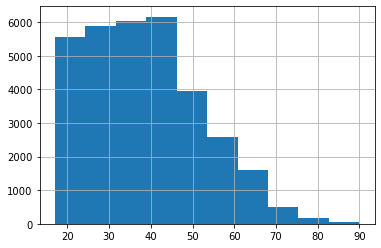

In [220]:
# Feature Engineering
data_income['native_USA'] = 0 
data_income.loc[ data_income['native.country'] == "United-States", "native_USA"] = 1
data_income.loc[ data_income['native.country'] != "United-States", "native_USA"] = 0

data_income.age.hist()

<AxesSubplot:>

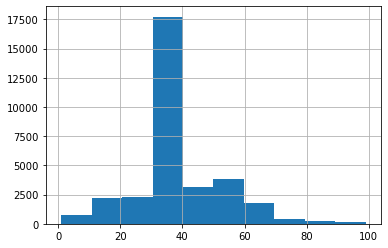

In [221]:
data_income['age_band'] = np.NaN
data_income.loc[ (data_income['age'] <= 29), 'age_band'] = 'Young'
data_income.loc[ (data_income['age'] >= 30) & (data_income['age'] <= 49), 'age_band'] = 'Lower-Middle'
data_income.loc[ (data_income['age'] >= 50) & (data_income['age'] <= 69), 'age_band'] = 'Upper-Middle'
data_income.loc[ (data_income['age'] >= 70) , 'age_band'] = 'Old'

data_income['age_band'].value_counts()

data_income['hours.per.week'].hist()

In [222]:
data_income['hours_band'] = np.NaN
data_income.loc[ (data_income['hours.per.week']) < 40, "hours_band"] = 'Low'
data_income.loc[ (data_income['hours.per.week']) == 40, "hours_band"] = 'Average'
data_income.loc[ (data_income['hours.per.week']) > 40, "hours_band"] = 'High'

data_income['native_USA'].value_counts()

data_income['hours_band'].value_counts()

data_income.columns

categorical_income = ['workclass','education','marital.status','occupation','relationship','race','sex','native_USA','age_band','hours_band']


data_income['income'].value_counts()

data_income.head()

small_income = data_income.sample(10000,random_state=42)

X_income = small_income[categorical_income]

y_income = small_income.loc[:,'income']

General Use Functions

In [223]:
from sklearn.preprocessing import OneHotEncoder

def prep_data(X, y, categoricalVars):

    encoder = OneHotEncoder(sparse=False)
    X_encoded = pd.DataFrame(encoder.fit_transform(X[categoricalVars]))
    X_encoded.columns = encoder.get_feature_names(categoricalVars)
    X.drop(categoricalVars, axis = 1, inplace = True)
    if X.shape[1] > 0:
        OH_X = pd.concat([X, pd.DataFrame(X_encoded, index=X.index)], axis = 1)
    else:
        OH_X = X_encoded 
        
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(OH_X, y, test_size = .30, train_size = .70, random_state = 42)
    return(X_Train, X_Test, Y_Train, Y_Test)

In [224]:
X_Train_Polling, X_Test_Polling, Y_Train_Polling, Y_Test_Polling = prep_data(X_polling, y_polling, categorical_polling)


In [225]:
X_Train_Income, X_Test_Income, Y_Train_Income, Y_Test_Income = prep_data(X_income, y_income, categorical_income)


##### BackPropogation - Baseline from Prior Assignment

In [226]:
nn_backprop_1 = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                algorithm = 'gradient_descent', max_iters=2000,
                                bias = True, is_classifier=True, learning_rate = 0.01,
                                early_stopping = False, 
                                clip_max = 5, max_attempts = 100,
                                random_state = 42, curve = True)

nn_backprop_1.fit(X_Train_Polling, Y_Train_Polling) # takes np array init weights, must equal number of nodes 

NeuralNetwork(clip_max=5, hidden_nodes=[156], learning_rate=0.01,
              max_iters=2000)

In [227]:
# predict labels for Training Set 
Y_Train_Pred = nn_backprop_1.predict(X_Train_Polling)

Y_Train_Accuracy = accuracy_score(Y_Train_Polling, Y_Train_Pred)
Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)

print("Polling, Train Accuracy: ",Y_Train_Accuracy)
print("Polling, Train F1 Score: ", Y_Train_F1_Score)

#predict labels for Testing Set 
Y_Test_Pred = nn_backprop_1.predict(X_Test_Polling)

Y_Test_Accuracy = accuracy_score(Y_Test_Polling, Y_Test_Pred)
Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)

print()
print("Polling, Test Accuracy: ", Y_Test_Accuracy)
print("Polling, Test F1 Scores: ", Y_Test_F1_Score)

print (classification_report(Y_Test_Polling, Y_Test_Pred))

Polling, Train Accuracy:  0.48
Polling, Train F1 Score:  0.3969516235917827

Polling, Test Accuracy:  0.485
Polling, Test F1 Scores:  0.3876337693222354
              precision    recall  f1-score   support

           0       0.44      0.75      0.56      1294
           1       0.60      0.29      0.39      1706

    accuracy                           0.48      3000
   macro avg       0.52      0.52      0.47      3000
weighted avg       0.53      0.48      0.46      3000



In [228]:
len(nn_backprop_1.fitness_curve)

2000

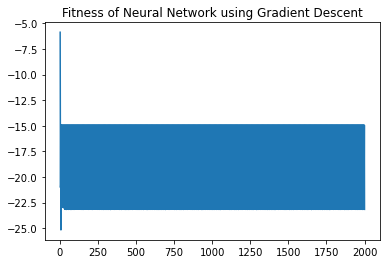

In [229]:
x = np.arange(1, 2001, 1)
y = nn_backprop_1.fitness_curve

plt.plot(x, y)
plt.title("Fitness of Neural Network using Gradient Descent")
plt.show()

Data 1 with better learning rate, to match results from A1

In [366]:
start = time.time()
nn_backprop_1 = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                algorithm = 'gradient_descent', max_iters=2000,
                                bias = True, is_classifier=True, learning_rate = 0.0001,
                                early_stopping = False, 
                                clip_max = 5, max_attempts = 100,
                                random_state = 42, curve = True)


nn_backprop_1.fit(X_Train_Polling, Y_Train_Polling) # takes np array init weights, must equal number of nodes 
end = time.time()
elapsed = end-start
print(elapsed)

83.5241219997406


In [367]:
# predict labels for Training Set 
Y_Train_Pred = nn_backprop_1.predict(X_Train_Polling)
Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
print("Polling, Train F1 Score: ", Y_Train_F1_Score)

#predict labels for Testing Set 
Y_Test_Pred = nn_backprop_1.predict(X_Test_Polling)
Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
print("Polling, Test F1 Scores: ", Y_Test_F1_Score)

print (classification_report(Y_Test_Polling, Y_Test_Pred))

Polling, Train F1 Score:  0.9285445183975889
Polling, Test F1 Scores:  0.9215514727325751
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1294
           1       0.92      0.93      0.92      1706

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



In [368]:
nn_backprop_1.fitness_curve

array([ -5.85773628, -14.94002808, -14.86826266, ...,  -0.24076524,
        -0.24076426,  -0.24076513])

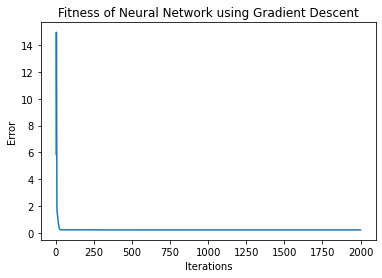

In [369]:
x = np.arange(1, 2001, 1)
y = nn_backprop_1.fitness_curve*-1

plt.plot(x, y)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title("Fitness of Neural Network using Gradient Descent")
plt.show()

In [236]:
learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75]

for num in learning_rate:
    
    print("learning rate:",num)
    nn = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'gradient_descent', max_iters=2000,
                                    bias = True, is_classifier=True, learning_rate = num,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True)

    nn.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print()
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    

learning rate: 0.0001
Polling, Train F1 Score:  0.9285445183975889

Polling, Test F1 Scores:  0.9215514727325751
learning rate: 0.001
Polling, Train F1 Score:  0.3969516235917827

Polling, Test F1 Scores:  0.3876337693222354
learning rate: 0.01
Polling, Train F1 Score:  0.3969516235917827

Polling, Test F1 Scores:  0.3876337693222354
learning rate: 0.05
Polling, Train F1 Score:  0.3969516235917827

Polling, Test F1 Scores:  0.3876337693222354
learning rate: 0.1
Polling, Train F1 Score:  0.3969516235917827

Polling, Test F1 Scores:  0.3876337693222354
learning rate: 0.25
Polling, Train F1 Score:  0.3969516235917827

Polling, Test F1 Scores:  0.3876337693222354
learning rate: 0.5
Polling, Train F1 Score:  0.3969516235917827

Polling, Test F1 Scores:  0.3876337693222354
learning rate: 0.75
Polling, Train F1 Score:  0.3969516235917827

Polling, Test F1 Scores:  0.3876337693222354


Data 2

In [237]:
nn_backprop_2 = mlrose.NeuralNetwork(hidden_nodes = [1], activation = 'tanh',
                                algorithm = 'gradient_descent', max_iters=2000,
                                bias = True, is_classifier=True, learning_rate = 0.05,
                                early_stopping = False, 
                                clip_max = 5, max_attempts = 100,
                                random_state = 42, curve = True)

nn_backprop_2.fit(X_Train_Income, Y_Train_Income) # takes np array init weights, must equal number of nodes 

NeuralNetwork(clip_max=5, hidden_nodes=[1], learning_rate=0.05, max_iters=2000)

In [238]:
# predict labels for Training Set 
Y_Train_Pred = nn_backprop_2.predict(X_Train_Income)

Y_Train_F1_Score = f1_score(Y_Train_Income, Y_Train_Pred)

print("Income, Train F1 Score: ", Y_Train_F1_Score)

#predict labels for Testing Set 
Y_Test_Pred = nn_backprop_2.predict(X_Test_Income)

Y_Test_F1_Score = f1_score(Y_Test_Income, Y_Test_Pred)

print()
print("Income, Test F1 Scores: ", Y_Test_F1_Score)

print (classification_report(Y_Test_Income, Y_Test_Pred))

Income, Train F1 Score:  0.24008278716798895

Income, Test F1 Scores:  0.2447388932190179
              precision    recall  f1-score   support

           0       0.77      0.83      0.79      2268
           1       0.28      0.21      0.24       732

    accuracy                           0.68      3000
   macro avg       0.53      0.52      0.52      3000
weighted avg       0.65      0.68      0.66      3000



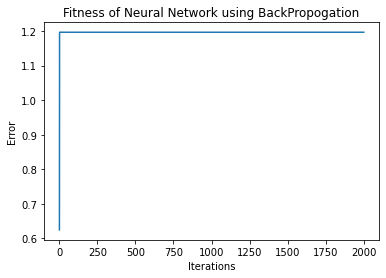

In [261]:
x = np.arange(1, 2001, 1)
y = nn_backprop_2.fitness_curve*-1

plt.plot(x, y)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title("Fitness of Neural Network using BackPropogation")
plt.show()

###### Random Hill Climbing

In [240]:
nn_rhc_1 = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                algorithm = 'random_hill_climb', max_iters=2000,
                                bias = True, is_classifier=True, learning_rate = 0.0001,
                                early_stopping = True, clip_max = 5, max_attempts = 100,
                                random_state = 42, curve=True,
                                restarts = 0 )

nn_rhc_1.fit(X_Train_Polling, Y_Train_Polling)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[156],
              learning_rate=0.0001, max_iters=2000)

In [241]:
# predict labels for Training Set 
Y_Train_Pred = nn_rhc_1.predict(X_Train_Polling)

Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)

print("Polling, Train F1 Score: ", Y_Train_F1_Score)

#predict labels for Testing Set 
Y_Test_Pred = nn_rhc_1.predict(X_Test_Polling)

Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)

print()
print("Polling, Test F1 Scores: ", Y_Test_F1_Score)

Polling, Train F1 Score:  0.3972171608414775

Polling, Test F1 Scores:  0.3876337693222354


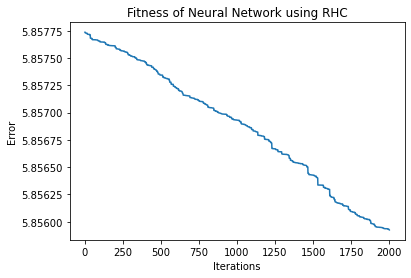

In [262]:
x = np.arange(1, 2001, 1)
y = nn_rhc_1.fitness_curve*-1

plt.plot(x, y)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title("Fitness of Neural Network using RHC")
plt.show()

Restarts

In [243]:
restarts = [1, 5, 10, 10]

for num in restarts:
    
    print("restarts:",num)
    nn_rhc = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'random_hill_climb', max_iters=2000,
                                    bias = True, is_classifier=True, learning_rate = 0.0001,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    restarts = int(num),
                                    )

    nn_rhc.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn_rhc.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn_rhc.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print()
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    

restarts: 1
Polling, Train F1 Score:  0.3972171608414775

Polling, Test F1 Scores:  0.3876337693222354
restarts: 5
Polling, Train F1 Score:  0.3974826101358065

Polling, Test F1 Scores:  0.3876337693222354
restarts: 10
Polling, Train F1 Score:  0.3972171608414775

Polling, Test F1 Scores:  0.3876337693222354
restarts: 10
Polling, Train F1 Score:  0.3972171608414775

Polling, Test F1 Scores:  0.3876337693222354


In [284]:
restarts = [1, 5, 10, 50]

rhc_restarts_dict = {
    'restarts': [],
    'y_train_F1_score':[],
    'y_test_F1_score':[],
    'fitness_curve': []
}

for num in restarts:
    

    print("restarts:",num)
    nn_rhc = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'random_hill_climb', max_iters=2000,
                                    bias = True, is_classifier=True, learning_rate = 0.75,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    restarts = int(num),
                                    )

    nn_rhc.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn_rhc.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn_rhc.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    
    rhc_restarts_dict['restarts'].append(num)
    rhc_restarts_dict['y_train_F1_score'].append(Y_Train_F1_Score)
    rhc_restarts_dict['y_test_F1_score'].append(Y_Test_F1_Score)
    rhc_restarts_dict['fitness_curve'].append(nn_rhc.fitness_curve)
    

restarts: 1
Polling, Train F1 Score:  0.7827070503958778
Polling, Test F1 Scores:  0.7812775978804827
restarts: 5
Polling, Train F1 Score:  0.8105671716539375
Polling, Test F1 Scores:  0.811408614668219
restarts: 10
Polling, Train F1 Score:  0.8257464512971121
Polling, Test F1 Scores:  0.8250355618776672
restarts: 50
Polling, Train F1 Score:  0.8393704721458906
Polling, Test F1 Scores:  0.8386530014641288


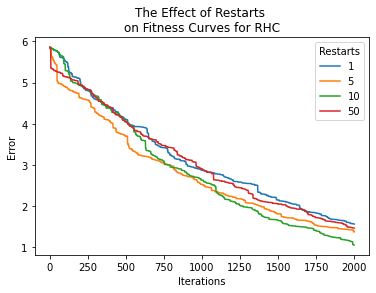

In [303]:
for i in range(0,len(rhc_restarts_dict)):
    y = rhc_restarts_dict['fitness_curve'][i]*-1
    label = rhc_restarts_dict['restarts'][i]
    
    plt.plot(y, label = label)

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('The Effect of Restarts \non Fitness Curves for RHC')
plt.legend(title = 'Restarts')
plt.show()

In [283]:
restarts_prob = [0.01, 0.10, 0.25, 0.50, 0.75, 1.0, 2.0]

rhc_restarts_dict = {
    'restarts': [],
    'y_train_F1_score':[],
    'y_test_F1_score':[],
    'fitness_curve': [],
    'runtime':[]
}

for num in restarts_prob:
    start = time.time()
    
    # Vary restarts by population size 
    num_restarts = len(X_Train_Polling)*num

    print("restarts:",num_restarts)
    nn_rhc = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'random_hill_climb', max_iters=2000,
                                    bias = True, is_classifier=True, learning_rate = 0.75,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    restarts = int(num_restarts),
                                    )

    nn_rhc.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn_rhc.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn_rhc.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    
    end = time.time()
    elapsed = end-start
    rhc_restarts_dict['restarts'].append(num)
    rhc_restarts_dict['y_train_F1_score'].append(Y_Train_F1_Score)
    rhc_restarts_dict['y_test_F1_score'].append(Y_Test_F1_Score)
    rhc_restarts_dict['fitness_curve'].append(nn_rhc.fitness_curve)
    rhc_restarts_dict['runtime'].append(elapsed)
    

restarts: 70.0


KeyboardInterrupt: 

learning rate

In [244]:
learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75]

for num in learning_rate:
    
    print("learning rate:",num)
    nn_rhc = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'random_hill_climb', max_iters=2000,
                                    bias = True, is_classifier=True, learning_rate = num,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    restarts = 1)

    nn_rhc.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn_rhc.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn_rhc.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print()
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    

learning rate: 0.0001
Polling, Train F1 Score:  0.3972171608414775

Polling, Test F1 Scores:  0.3876337693222354
learning rate: 0.001
Polling, Train F1 Score:  0.3992068737607402

Polling, Test F1 Scores:  0.3905138339920948
learning rate: 0.01
Polling, Train F1 Score:  0.41162149001785425

Polling, Test F1 Scores:  0.4040325707638619
learning rate: 0.05
Polling, Train F1 Score:  0.4682395644283121

Polling, Test F1 Scores:  0.46886184681460275
learning rate: 0.1
Polling, Train F1 Score:  0.5290088074933594

Polling, Test F1 Scores:  0.5318376773342132
learning rate: 0.25
Polling, Train F1 Score:  0.6226391494684177

Polling, Test F1 Scores:  0.6259946949602122
learning rate: 0.5
Polling, Train F1 Score:  0.7108178762604256

Polling, Test F1 Scores:  0.7196234186525449
learning rate: 0.75
Polling, Train F1 Score:  0.7827070503958778

Polling, Test F1 Scores:  0.7812775978804827


In [287]:
learning_rate = [0.60, 0.75, .90, 0.95]

rhc_LR_dict = {
    'learning_rate': [],
    'y_train_F1_score':[],
    'y_test_F1_score':[],
    'fitness_curve': [],
    'runtime':[]
}

for num in learning_rate:
    start = time.time()
    print("learning rate:",num)
    nn = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'random_hill_climb', max_iters=2000,
                                    bias = True, is_classifier=True, learning_rate = num,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    restarts = 10)

    nn.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    
    end = time.time()
    elapsed = end-start
    rhc_LR_dict['learning_rate'].append(num)
    rhc_LR_dict['y_train_F1_score'].append(Y_Train_F1_Score)
    rhc_LR_dict['y_test_F1_score'].append(Y_Test_F1_Score)
    rhc_LR_dict['fitness_curve'].append(nn.fitness_curve)
    rhc_LR_dict['runtime'].append(elapsed)
    

learning rate: 0.6
Polling, Train F1 Score:  0.7933990021747473
Polling, Test F1 Scores:  0.7947572237116474
learning rate: 0.75
Polling, Train F1 Score:  0.8257464512971121
Polling, Test F1 Scores:  0.8250355618776672
learning rate: 0.9
Polling, Train F1 Score:  0.8477575757575758
Polling, Test F1 Scores:  0.839038189533239
learning rate: 0.95
Polling, Train F1 Score:  0.8545213087045757
Polling, Test F1 Scores:  0.8458075407990996


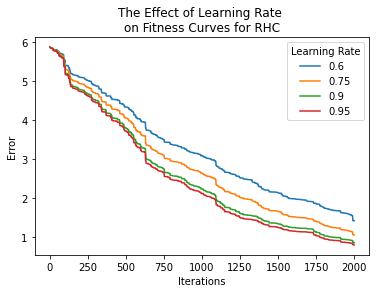

In [300]:
for i in range(0,len(rhc_LR_dict)-1):
    y = rhc_LR_dict['fitness_curve'][i]*-1
    label = rhc_LR_dict['learning_rate'][i]
    
    plt.plot(y, label = label)

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('The Effect of Learning Rate \non Fitness Curves for RHC')
plt.legend(title = 'Learning Rate')
plt.show()

In [371]:
learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75]

rhc_LR_dict2 = {
    'learning_rate': [],
    'y_train_F1_score':[],
    'y_test_F1_score':[],
    'fitness_curve': [],
    'runtime':[]
}

for num in learning_rate:
    start = time.time()
    print("learning rate:",num)
    nn = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'random_hill_climb', max_iters=2000,
                                    bias = True, is_classifier=True, learning_rate = num,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    restarts = 10)

    nn.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    
    end = time.time()
    elapsed = end-start
    rhc_LR_dict2['learning_rate'].append(num)
    rhc_LR_dict2['y_train_F1_score'].append(Y_Train_F1_Score)
    rhc_LR_dict2['y_test_F1_score'].append(Y_Test_F1_Score)
    rhc_LR_dict2['fitness_curve'].append(nn.fitness_curve)
    rhc_LR_dict2['runtime'].append(elapsed)
    

learning rate: 0.0001


KeyboardInterrupt: 

##### Simulated Annealing

In [245]:
nn_sa_1 = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                algorithm = 'simulated_annealing', max_iters=2000,
                                bias = True, is_classifier=True, learning_rate = 0.0001,
                                early_stopping = True, clip_max = 5, max_attempts = 100,
                                random_state = 42, schedule = mlrose.GeomDecay(), curve=True)

nn_sa_1.fit(X_Train_Polling, Y_Train_Polling)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[156],
              learning_rate=0.0001, max_iters=2000,
              schedule=<mlrose.decay.GeomDecay object at 0x7f87a09b0550>)

In [246]:
# predict labels for Training Set 
Y_Train_Pred = nn_sa_1.predict(X_Train_Polling)

Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)

print("Polling, Train F1 Score: ", Y_Train_F1_Score)

#predict labels for Testing Set 
Y_Test_Pred = nn_sa_1.predict(X_Test_Polling)

Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)

print()
print("Polling, Test F1 Scores: ", Y_Test_F1_Score)

Polling, Train F1 Score:  0.3969516235917827

Polling, Test F1 Scores:  0.3876337693222354


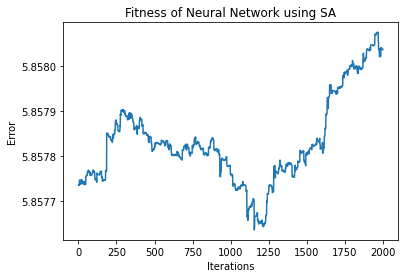

In [263]:
x = np.arange(1, 2001, 1)
y = nn_sa_1.fitness_curve*-1

plt.plot(x, y)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title("Fitness of Neural Network using SA")
plt.show()

schedule

In [248]:
schedules = [mlrose.GeomDecay(), mlrose.ArithDecay(), mlrose.ExpDecay()]

for sched in schedules:
    
    print("schedule:",sched)
    nn = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'simulated_annealing', max_iters=2000,
                                    bias = True, is_classifier=True, learning_rate = 0.0001,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    schedule = sched )

    nn.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print()
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    

schedule: <mlrose.decay.GeomDecay object at 0x7f87a093b290>
Polling, Train F1 Score:  0.3969516235917827

Polling, Test F1 Scores:  0.3876337693222354
schedule: <mlrose.decay.ArithDecay object at 0x7f87a094e3d0>
Polling, Train F1 Score:  0.3969516235917827

Polling, Test F1 Scores:  0.3876337693222354
schedule: <mlrose.decay.ExpDecay object at 0x7f87a0931b10>
Polling, Train F1 Score:  0.3969516235917827

Polling, Test F1 Scores:  0.3876337693222354


learning_rate

In [249]:
learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75]

for num in learning_rate:
    
    print("learning rate:",num)
    nn = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'simulated_annealing', max_iters=2000,
                                    bias = True, is_classifier=True, learning_rate = num,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    schedule = mlrose.GeomDecay())

    nn.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print()
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    

learning rate: 0.0001
Polling, Train F1 Score:  0.3969516235917827

Polling, Test F1 Scores:  0.3876337693222354
learning rate: 0.001
Polling, Train F1 Score:  0.39741679085941384

Polling, Test F1 Scores:  0.3869944488501189
learning rate: 0.01
Polling, Train F1 Score:  0.40309058030577016

Polling, Test F1 Scores:  0.3943329397874853
learning rate: 0.05
Polling, Train F1 Score:  0.44134253450439154

Polling, Test F1 Scores:  0.43452380952380953
learning rate: 0.1
Polling, Train F1 Score:  0.4857438321760969

Polling, Test F1 Scores:  0.4898813677599442
learning rate: 0.25
Polling, Train F1 Score:  0.5894601542416452

Polling, Test F1 Scores:  0.5959504381988516
learning rate: 0.5
Polling, Train F1 Score:  0.6454384634824362

Polling, Test F1 Scores:  0.6527071492671254
learning rate: 0.75
Polling, Train F1 Score:  0.7064125676023693

Polling, Test F1 Scores:  0.7067030633909613


In [280]:
learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.10, 0.25, 0.50, 0.60, 0.75, .90, 0.95]

sa_LR_dict = {
    'learning_rate': [],
    'y_train_F1_score':[],
    'y_test_F1_score':[],
    'fitness_curve': [],
    'runtime':[]
}

for num in learning_rate:
    start = time.time()
    print("learning rate:",num)
    nn = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'simulated_annealing', max_iters=2000,
                                    bias = True, is_classifier=True, learning_rate = num,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    schedule = mlrose.GeomDecay())

    nn.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    
    end = time.time()
    elapsed = end-start
    sa_LR_dict['learning_rate'].append(num)
    sa_LR_dict['y_train_F1_score'].append(Y_Train_F1_Score)
    sa_LR_dict['y_test_F1_score'].append(Y_Test_F1_Score)
    sa_LR_dict['fitness_curve'].append(nn.fitness_curve)
    sa_LR_dict['runtime'].append(elapsed)
    
    

learning rate: 0.0001
Polling, Train F1 Score:  0.3969516235917827
Polling, Test F1 Scores:  0.3876337693222354
learning rate: 0.001
Polling, Train F1 Score:  0.39741679085941384
Polling, Test F1 Scores:  0.3869944488501189
learning rate: 0.01
Polling, Train F1 Score:  0.40309058030577016
Polling, Test F1 Scores:  0.3943329397874853
learning rate: 0.05
Polling, Train F1 Score:  0.44134253450439154
Polling, Test F1 Scores:  0.43452380952380953
learning rate: 0.1
Polling, Train F1 Score:  0.4857438321760969
Polling, Test F1 Scores:  0.4898813677599442
learning rate: 0.25
Polling, Train F1 Score:  0.5894601542416452
Polling, Test F1 Scores:  0.5959504381988516
learning rate: 0.5
Polling, Train F1 Score:  0.6454384634824362
Polling, Test F1 Scores:  0.6527071492671254
learning rate: 0.6
Polling, Train F1 Score:  0.6675981201575003
Polling, Test F1 Scores:  0.6770802042655453
learning rate: 0.75
Polling, Train F1 Score:  0.7064125676023693
Polling, Test F1 Scores:  0.7067030633909613
learni

In [313]:
sa_LR_dict['runtime']

[29.705255031585693,
 28.350053787231445,
 27.90383291244507,
 27.592477083206177,
 25.4814670085907,
 23.03993797302246,
 22.623136043548584,
 22.300074815750122,
 22.226893186569214,
 21.933329105377197,
 23.678389072418213]

In [325]:
sa_LR_dict['fitness_curve']

[array([-5.85773664, -5.85773717, -5.85773753, ..., -5.85803738,
        -5.85803722, -5.85803723]),
 array([-5.85773988, -5.8577452 , -5.85774875, ..., -5.85960558,
        -5.85960664, -5.85959647]),
 array([-5.85777231, -5.85782548, -5.85786042, ..., -5.80834474,
        -5.8082446 , -5.80811292]),
 array([-5.85791663, -5.85818283, -5.8583577 , ..., -5.35946632,
        -5.3594485 , -5.35964737]),
 array([-5.85809756, -5.85863074, -5.85898092, ..., -4.83006503,
        -4.83009323, -4.82987072]),
 array([-5.85864376, -5.85998262, -5.86085973, ..., -3.87548312,
        -3.87547854, -3.87566232]),
 array([-5.85956551, -5.86226274, -5.86402657, ..., -2.83599595,
        -2.8363056 , -2.83503908]),
 array([-5.8599382 , -5.86318413, -5.86530467, ..., -2.50409059,
        -2.50444663, -2.50368741]),
 array([-5.86050148, -5.86457616, -5.86723523, ..., -2.06714966,
        -2.06720297, -2.06608955]),
 array([-5.86106986, -5.86597999, -5.86918   , ..., -1.58933494,
        -1.58955626, -1.58

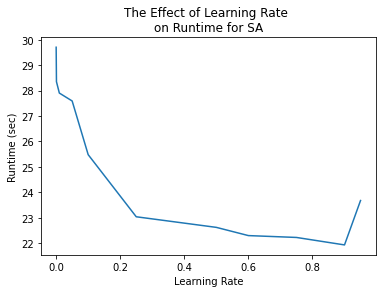

In [337]:
plt.clf()

x = sa_LR_dict['learning_rate']
y = sa_LR_dict['runtime']
plt.xlabel('Learning Rate')
plt.ylabel('Runtime (sec)')
plt.title("The Effect of Learning Rate \non Runtime for SA")
plt.plot(x, y)
plt.show()

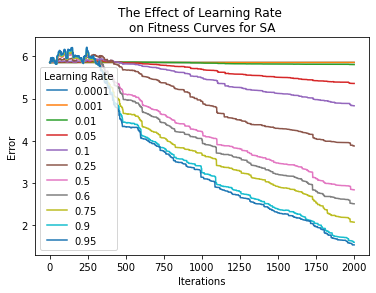

In [338]:
for i in range(0,len(sa_LR_dict['learning_rate'])):
    y = sa_LR_dict['fitness_curve'][i]*-1
    label = sa_LR_dict['learning_rate'][i]
    
    plt.plot(y, label = label)

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('The Effect of Learning Rate \non Fitness Curves for SA')
plt.legend(title = 'Learning Rate')
plt.show()

##### Genetic Algorithm

In [250]:
nn_ga_1 = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                algorithm = 'genetic_alg', max_iters=2000,
                                bias = True, is_classifier=True, learning_rate = 0.0001,
                                early_stopping = True, clip_max = 5, max_attempts = 100,
                                random_state = 42, curve = True,
                                pop_size = 200, mutation_prob = 0.2)

nn_ga_1.fit(X_Train_Polling, Y_Train_Polling)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[156],
              learning_rate=0.0001, max_iters=2000, mutation_prob=0.2)

In [251]:
# predict labels for Training Set 
Y_Train_Pred = nn_ga_1.predict(X_Train_Polling)

Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)

print("Polling, Train F1 Score: ", Y_Train_F1_Score)

#predict labels for Testing Set 
Y_Test_Pred = nn_ga_1.predict(X_Test_Polling)

Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)

print()
print("Polling, Test F1 Scores: ", Y_Test_F1_Score)

Polling, Train F1 Score:  0.8108176100628931

Polling, Test F1 Scores:  0.8111638954869358


In [322]:
len(nn_ga_1.fitness_curve)

0

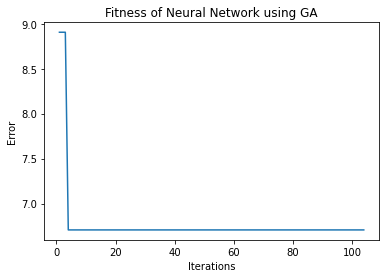

In [267]:
x = np.arange(1, len(nn_ga_1.fitness_curve)+1, 1)
y = nn_ga_1.fitness_curve*-1

plt.plot(x, y)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title("Fitness of Neural Network using GA")
plt.show()

In [254]:
#nn_ga_1.fitted_weights

#nn_ga_1.loss

#nn_ga_1.predicted_probs

#nn_ga_1.fitness_curve

pop_size

In [ ]:
start = time.time()
nn_ga_2 = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                algorithm = 'genetic_alg', 
                                max_iters=2000,
                                bias = True, is_classifier=True, learning_rate = 0.9,
                                early_stopping = True, clip_max = 5, max_attempts = 100,
                                random_state = 42, curve = True,
                                pop_size = 200, mutation_prob = 0.9)

nn_ga_2.fit(X_Train_Polling, Y_Train_Polling)

end = time.time()
elapsed_ga_2 = end-start
print(elapsed_ga_2)

In [ ]:
# predict labels for Training Set 
Y_Train_Pred = nn_ga_2.predict(X_Train_Polling)
Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)

print("Polling, Train F1 Score: ", Y_Train_F1_Score)

#predict labels for Testing Set 
Y_Test_Pred = nn_ga_2.predict(X_Test_Polling)
Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)

print("Polling, Test F1 Scores: ", Y_Test_F1_Score)


optimal for GA: with mutation_prob .70 and iters 2000


In [345]:
start = time.time()
nn_ga_3 = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                algorithm = 'genetic_alg', 
                               max_iters=2000,
                                bias = True, is_classifier=True, learning_rate = 0.9,
                                early_stopping = True, clip_max = 5, max_attempts = 100,
                                random_state = 42, curve = True,
                                pop_size = 200, mutation_prob = 0.7)

nn_ga_3.fit(X_Train_Polling, Y_Train_Polling)

end = time.time()
elapsed_ga_3 = end-start
print(elapsed_ga_3)

# predict labels for Training Set 
Y_Train_Pred = nn_ga_3.predict(X_Train_Polling)
Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)

print("Polling, Train F1 Score: ", Y_Train_F1_Score)

#predict labels for Testing Set 
Y_Test_Pred = nn_ga_3.predict(X_Test_Polling)
Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)

print("Polling, Test F1 Scores: ", Y_Test_F1_Score)

nn_ga_3.fitness_curve

3171.166615009308
Polling, Train F1 Score:  0.8504495977283484
Polling, Test F1 Scores:  0.8562019758507136


array([-9.38898498, -9.07329834, -7.83114128, -7.83114128, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66321047,
       -5.66321047, -5.66321047, -5.66321047, -5.66321047, -5.66

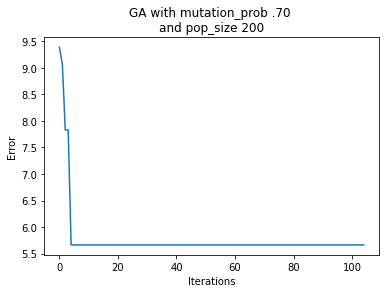

In [364]:
y = nn_ga_3.fitness_curve*-1

plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title('GA with mutation_prob .70 \nand pop_size 200')
plt.plot(y)
plt.show()

In [330]:
#pop_size_list = [.05, .10, .25, .50, .75, 1.0, 1.50, 2.0, 2.50, 3.0, 5.0]
#problem_length = len(X_Train_Polling)

pop_size_list = [50, 100, 200]

ga_popsize_dict = {
    'pop_size': [],
    'y_train_F1_score':[],
    'y_test_F1_score':[],
    'fitness_curve': [],
    'runtime':[]
}

for num in pop_size_list:
    
    start = time.time()
    
    size = num
    #size = problem_length * num
    print(size)
    
    nn = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'genetic_alg', 
                                    #max_iters=2000,
                                    max_iters=100,
                                    bias = True, is_classifier=True, learning_rate = 0.01,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    pop_size = size, mutation_prob = 0.)

    nn.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    
    end = time.time()
    elapsed = end-start
    ga_popsize_dict['pop_size'].append(size)
    ga_popsize_dict['y_train_F1_score'].append(Y_Train_F1_Score)
    ga_popsize_dict['y_test_F1_score'].append(Y_Test_F1_Score)
    ga_popsize_dict['fitness_curve'].append(nn.fitness_curve)
    ga_popsize_dict['runtime'].append(elapsed)
    
    

50
Polling, Train F1 Score:  0.7500619271736437
Polling, Test F1 Scores:  0.7456165564817475
100
Polling, Train F1 Score:  0.7628029127372568
Polling, Test F1 Scores:  0.7634738899748673
200
Polling, Train F1 Score:  0.7625768267698612
Polling, Test F1 Scores:  0.7772585669781932


In [339]:
#pop_size_list = [.05, .10, .25, .50, .75, 1.0, 1.50, 2.0, 2.50, 3.0, 5.0]
#problem_length = len(X_Train_Polling)

pop_size_list = [50, 100, 200, 350, 700, 1400]

ga_popsize_dict2 = {
    'pop_size': [],
    'y_train_F1_score':[],
    'y_test_F1_score':[],
    'fitness_curve': [],
    'runtime':[]
}

for num in pop_size_list:
    
    start = time.time()
    
    size = num
    #size = problem_length * num
    print(size)
    
    nn = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'genetic_alg', 
                                    #max_iters=2000,
                                    max_iters=1000,
                                    bias = True, is_classifier=True, learning_rate = 0.01,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    pop_size = size, mutation_prob = 0.9)

    nn.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    
    end = time.time()
    elapsed = end-start
    ga_popsize_dict2['pop_size'].append(size)
    ga_popsize_dict2['y_train_F1_score'].append(Y_Train_F1_Score)
    ga_popsize_dict2['y_test_F1_score'].append(Y_Test_F1_Score)
    ga_popsize_dict2['fitness_curve'].append(nn.fitness_curve)
    ga_popsize_dict2['runtime'].append(elapsed)
    
    

50
Polling, Train F1 Score:  0.8287996006987771
Polling, Test F1 Scores:  0.8292682926829268
100
Polling, Train F1 Score:  0.8346530041918957
Polling, Test F1 Scores:  0.8406742794997282
200


KeyboardInterrupt: 

mutation_prob

In [256]:
mutation_prob_list = np.arange(0.1, 1, 0.1) 

for num in mutation_prob_list:
    
    print("mutation_prob:",num)
    nn = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'genetic_alg', max_iters=2000,
                                    bias = True, is_classifier=True, learning_rate = 0.01,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    pop_size = 200, mutation_prob = num)

    nn.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print()
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    

mutation_prob: 0.1
Polling, Train F1 Score:  0.8415398388540734

Polling, Test F1 Scores:  0.8405496499870364
mutation_prob: 0.2
Polling, Train F1 Score:  0.8108176100628931

Polling, Test F1 Scores:  0.8111638954869358
mutation_prob: 0.30000000000000004
Polling, Train F1 Score:  0.8400702987697716

Polling, Test F1 Scores:  0.8333333333333334
mutation_prob: 0.4
Polling, Train F1 Score:  0.8349349227587883

Polling, Test F1 Scores:  0.8244274809160306
mutation_prob: 0.5
Polling, Train F1 Score:  0.8257575757575757

Polling, Test F1 Scores:  0.825997045790251
mutation_prob: 0.6
Polling, Train F1 Score:  0.8679060665362036

Polling, Test F1 Scores:  0.8664219147133579
mutation_prob: 0.7000000000000001
Polling, Train F1 Score:  0.8504495977283484

Polling, Test F1 Scores:  0.8562019758507136
mutation_prob: 0.8
Polling, Train F1 Score:  0.8556002009040683

Polling, Test F1 Scores:  0.8530612244897959
mutation_prob: 0.9
Polling, Train F1 Score:  0.8599439775910364

Polling, Test F1 Scores: 

In [343]:
mutation_prob_list = np.arange(0.1, 1, 0.1) 
ga_mutation_dict = {
    'mutation_prob':[],
    'y_train_F1_score':[],
    'y_test_F1_score':[],
    'fitness_curve': [],
    'runtime':[]
    
}

for num in mutation_prob_list:
    start = time.time()
    print("mutation_prob:",num)
    nn = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'genetic_alg', 
                                    #max_iters=2000,
                                    max_iters=100,
                                    bias = True, is_classifier=True, learning_rate = 0.01,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    pop_size = 200, mutation_prob = num)

    nn.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    
    end = time.time()
    elapsed = end-start
    ga_mutation_dict['mutation_prob'].append(num)
    ga_mutation_dict['y_train_F1_score'].append(Y_Train_F1_Score)
    ga_mutation_dict['y_test_F1_score'].append(Y_Test_F1_Score)
    ga_mutation_dict['fitness_curve'].append(nn.fitness_curve)
    ga_mutation_dict['runtime'].append(elapsed)
    

mutation_prob: 0.1
Polling, Train F1 Score:  0.8084597920898553
Polling, Test F1 Scores:  0.8094972067039107
mutation_prob: 0.2
Polling, Train F1 Score:  0.8108176100628931
Polling, Test F1 Scores:  0.8111638954869358
mutation_prob: 0.30000000000000004
Polling, Train F1 Score:  0.8400702987697716
Polling, Test F1 Scores:  0.8333333333333334
mutation_prob: 0.4
Polling, Train F1 Score:  0.8349349227587883
Polling, Test F1 Scores:  0.8244274809160306
mutation_prob: 0.5
Polling, Train F1 Score:  0.8257575757575757
Polling, Test F1 Scores:  0.825997045790251
mutation_prob: 0.6
Polling, Train F1 Score:  0.8265371340917806
Polling, Test F1 Scores:  0.8366745283018868
mutation_prob: 0.7000000000000001
Polling, Train F1 Score:  0.8504495977283484
Polling, Test F1 Scores:  0.8562019758507136
mutation_prob: 0.8
Polling, Train F1 Score:  0.8556002009040683
Polling, Test F1 Scores:  0.8530612244897959
mutation_prob: 0.9
Polling, Train F1 Score:  0.8167149358709144
Polling, Test F1 Scores:  0.822136

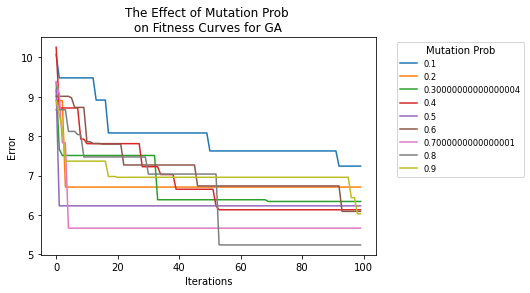

In [353]:


for i in range(0,len(ga_mutation_dict['mutation_prob'])):
    y = ga_mutation_dict['fitness_curve'][i]*-1
    label = ga_mutation_dict['mutation_prob'][i]
    
    plt.plot(y, label = label)

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('The Effect of Mutation Prob \non Fitness Curves for GA')
plt.legend(title = 'Mutation Prob', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='small', fancybox=True)
plt.show()

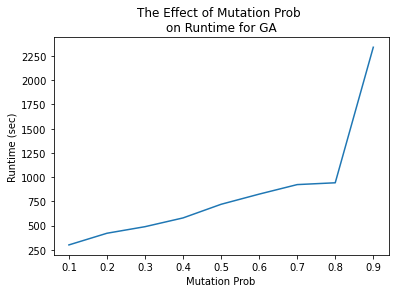

In [360]:
y = ga_mutation_dict['runtime']
x = ga_mutation_dict['mutation_prob']

plt.ylabel('Runtime (sec)')
plt.xlabel('Mutation Prob')
plt.title('The Effect of Mutation Prob \non Runtime for GA')
plt.plot(x,y)
plt.show()

learning_rate

In [257]:
learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75]

for num in learning_rate:
    
    print("learning rate:",num)
    nn = mlrose.NeuralNetwork(hidden_nodes = [156], activation = 'identity',
                                    algorithm = 'genetic_alg', max_iters=2000,
                                    bias = True, is_classifier=True, learning_rate = num,
                                    early_stopping = True, clip_max = 5, max_attempts = 100,
                                    random_state = 42, curve = True,
                                    pop_size = 200, mutation_prob = .2)

    nn.fit(X_Train_Polling, Y_Train_Polling)
    
    # predict labels for Training Set 
    Y_Train_Pred = nn.predict(X_Train_Polling)
    Y_Train_F1_Score = f1_score(Y_Train_Polling, Y_Train_Pred)
    print("Polling, Train F1 Score: ", Y_Train_F1_Score)

    #predict labels for Testing Set 
    Y_Test_Pred = nn.predict(X_Test_Polling)
    Y_Test_F1_Score = f1_score(Y_Test_Polling, Y_Test_Pred)
    print()
    print("Polling, Test F1 Scores: ", Y_Test_F1_Score)
    

learning rate: 0.0001
Polling, Train F1 Score:  0.8108176100628931

Polling, Test F1 Scores:  0.8111638954869358
learning rate: 0.001
Polling, Train F1 Score:  0.8108176100628931

Polling, Test F1 Scores:  0.8111638954869358
learning rate: 0.01
Polling, Train F1 Score:  0.8108176100628931

Polling, Test F1 Scores:  0.8111638954869358
learning rate: 0.05
Polling, Train F1 Score:  0.8108176100628931

Polling, Test F1 Scores:  0.8111638954869358
learning rate: 0.1
Polling, Train F1 Score:  0.8108176100628931

Polling, Test F1 Scores:  0.8111638954869358
learning rate: 0.25
Polling, Train F1 Score:  0.8108176100628931

Polling, Test F1 Scores:  0.8111638954869358
learning rate: 0.5
Polling, Train F1 Score:  0.8108176100628931

Polling, Test F1 Scores:  0.8111638954869358
learning rate: 0.75
Polling, Train F1 Score:  0.8108176100628931

Polling, Test F1 Scores:  0.8111638954869358
